# Relative Windmill Location

In [9]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

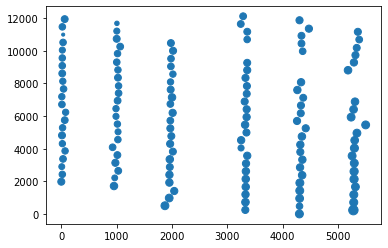

In [43]:
cwd = Path.cwd()
rel_location_path = '../data/sdwpf_baidukddcup2022_turb_location.csv'
rel_power_path = '../data/sdwpf134_initial_kddcup.csv'
dirpath_location = os.path.join(cwd, rel_location_path)
dirpath_power = os.path.join(cwd, rel_power_path)

turbine_location = pd.read_csv(dirpath_location)
power_data = pd.read_csv(dirpath_power)
power_data[power_data['Patv']<0] = 0
total_power = power_data[['TurbID', 'Patv']].groupby(by='TurbID').sum()
turbine_location = turbine_location.merge(total_power, how='left', on='TurbID')

plt.scatter(turbine_location['x'], turbine_location['y'], s=turbine_location['Patv']/5000)